# Atelier Python: Présentation de Seaborn


# Visualisation statistiques de données
## ----- Outil construit sur matplotlib
## ----- Visualisation complexes (très rapide)
## ----- Calcul statistiques simples

# Données sous la forme de dataframe (pandas) ou alors listes python

Avant de pouvoir utiliser ce notebook, je vous conseille d'installer anaconda et de créer un environnement afin de pouvoir en profiter pleinement. Pour ce faire suivez les instructions ici: https://www.anaconda.com/

Une fois anaconda installé:
- sur Windows: ouvrez Anaconda Prompt
- sur Mac ou Linux: ouvrez un terminal

En suite, tapez:
```
conda create -n seaborn-environment
conda install -c conda-forge seaborn matplotlib numpy
conda activate seaborn-environment
```

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Dataset exemple 1: les voitures, consommation, puissance, acceleration, ...

In [3]:
cars = sns.load_dataset('mpg')
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# RELPLOT: montrer les liens entre plusieurs variables
## exemple: scatterplot (points) ou lineplot (lignes)
## On peut utiliser tous les paramètres des points pour représenter des variables (taille, couleur, marqueur)

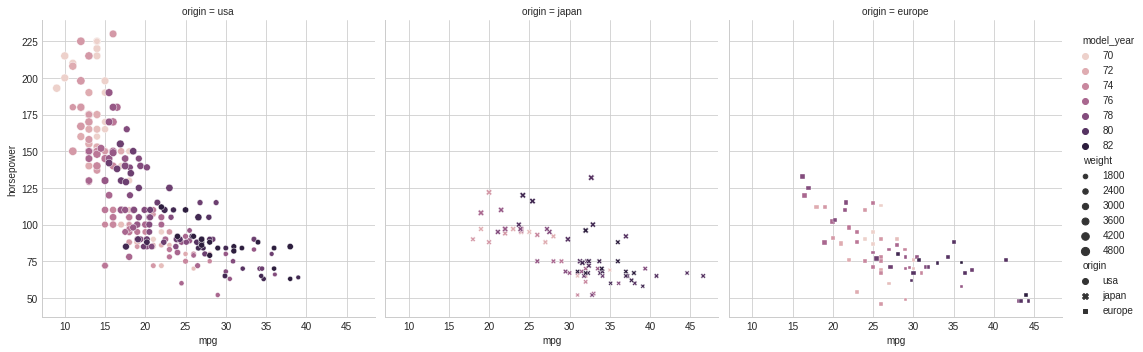

In [4]:
sns.relplot(kind='scatter',#'line'
            data=cars,
            x = 'mpg',
            y = 'horsepower',
            hue='model_year',
            size='weight',
            style='origin',
            col='origin'
            )

# Dataset exemple 2 : Manchots

In [5]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# DISPLOT: montrer la distribution de variables
## Fonctionne en 1d et en 2d
### 2 possibilité: histogramme, kernel density estimator (kde) et distribution cumulative (ecdf)

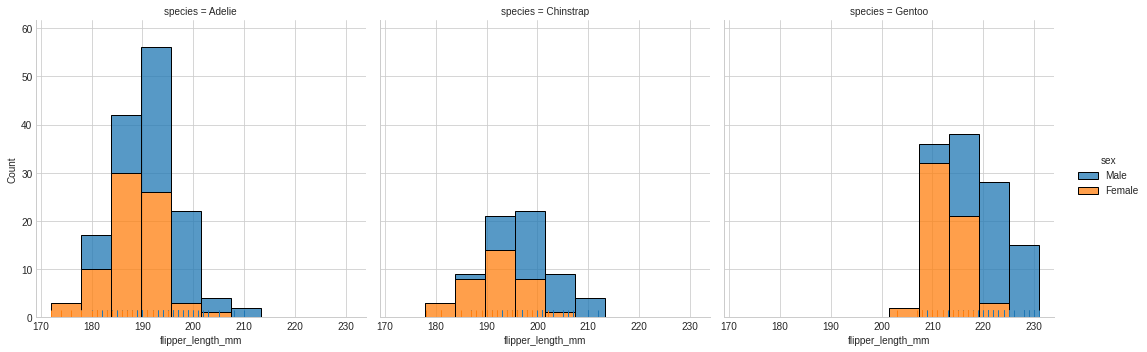

In [7]:
# 1d
sns.displot(kind='hist',#'kde','hist','ecdf'
            data=penguins,
            x = 'flipper_length_mm',
            hue='sex',
            col='species',
            rug=True,
            multiple='stack', #stack, fill, layer
            )

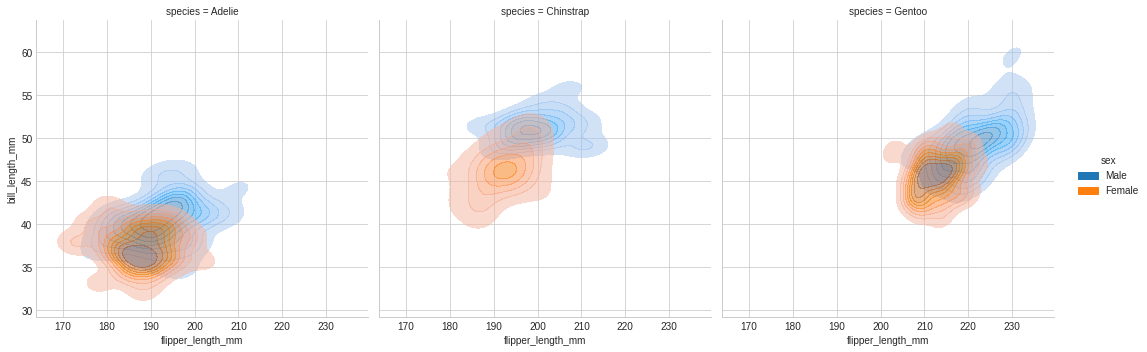

In [9]:
#2d
sns.displot(kind='kde',#'kde','hist'
            data=penguins,
            x = 'flipper_length_mm',
            y = 'bill_length_mm',
            fill=True,
            alpha=0.5,
            hue='sex',
            col='species',
            rug=False
            )

# PAIRPLOT: représentation rapide des distributions et des liens entre les variables
## Displot + relplot

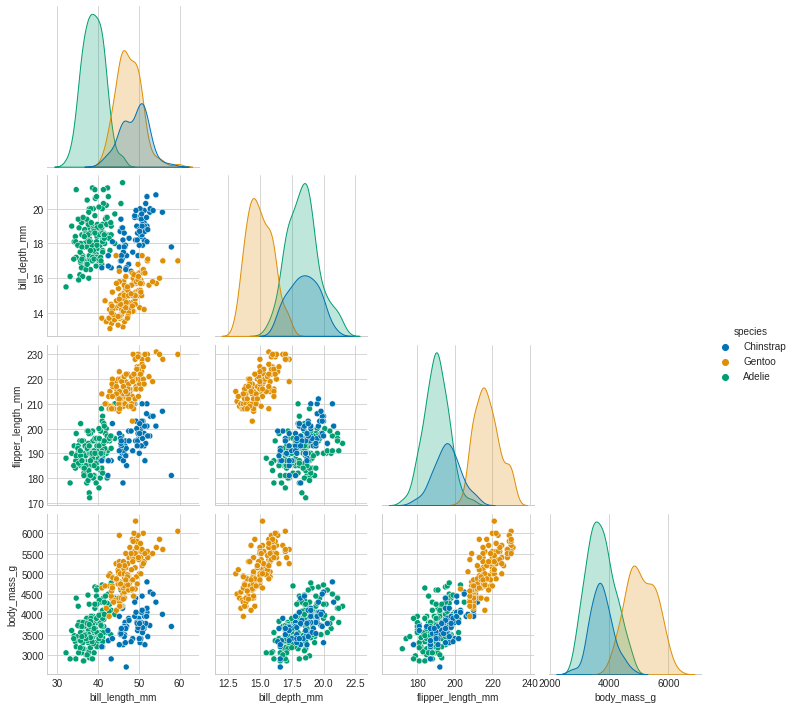

In [10]:
sns.pairplot(penguins, 
             diag_kind='kde',#hist, kde, ecdf
             kind='scatter',#scatter,kde,hist
             hue='species', 
             palette='colorblind', 
             corner=True,
             hue_order=['Chinstrap','Gentoo','Adelie']
             )

# Dataset exemple 3: passagers de vols en avion

In [11]:
flights = sns.load_dataset('flights')
flights = flights.pivot('month','year','passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


# HEATMAP: représenter des données cycliques
## Gestion des couleurs:

<AxesSubplot:xlabel='year', ylabel='month'>

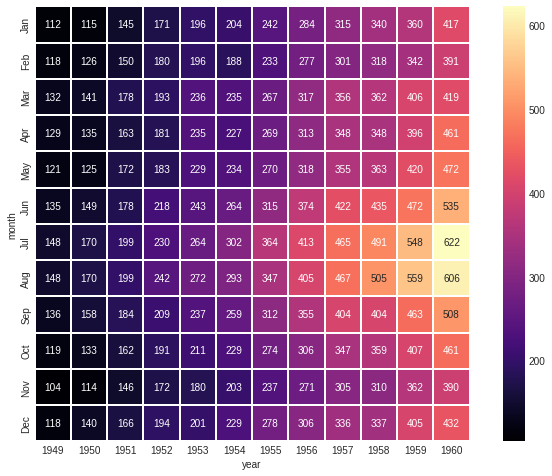

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(flights, 
            cmap="magma",#viridis    
            square=True, 
            linewidth=2, 
            annot=True,
            fmt = '03d',
           )

# Dataset exemple 4: survivants du Titanic

In [15]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# CATPLOT: comparer des données par catégorie
## Permet de comparer une variable en fonction de catégories 
## On peut représenter :
### ----- l'ensemble des valeurs (stripplot, swarmplot)
### ----- des distributions (violin, box, boxen)
### ----- des estimations (pointplot, barplot, countplot)

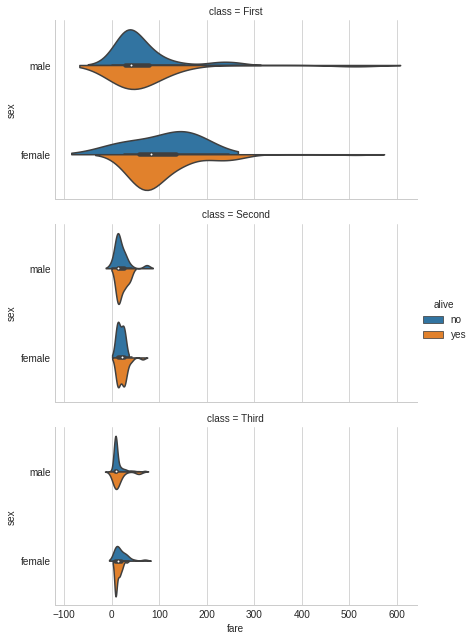

In [17]:
sns.catplot(kind = 'violin',#strip, violin, box, boxen, point
            data = titanic,
            x = 'fare',
            y = 'sex',
            hue='alive',
            row='class',
            #col='embark_town',
            split=True, #if violin
            aspect =2, height=3
           )

# Dataset exemple 5: geysers

In [18]:
geyser = sns.load_dataset('geyser')
geyser

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


# JOINTPLOT: distribution 1d et 2d (un peu comme PAIRPLOT)

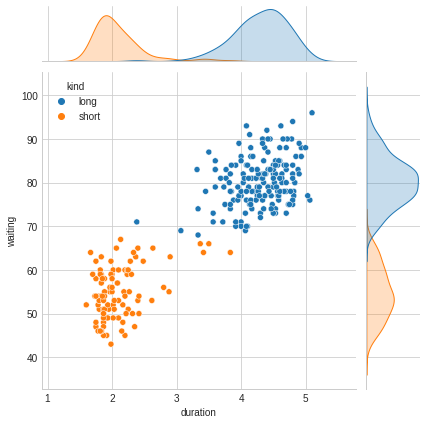

In [19]:
sns.jointplot(data=geyser,
              x='duration',
              y='waiting', 
              hue='kind'
              )


# Dataset exemple 6: exoplanètes

In [20]:
planets = sns.load_dataset('planets')
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


# Intégration avec matplotlib et styles différents

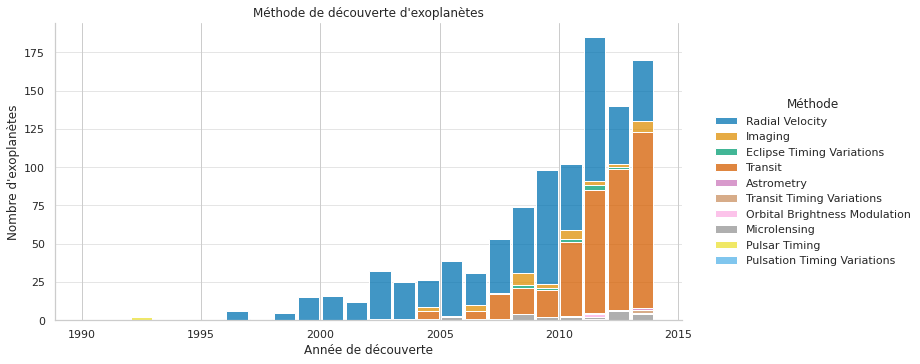

In [22]:
sns.set_theme(style="whitegrid", palette="colorblind")

plot = sns.displot(
    planets,
    bins = range(1990,2015),
    kind='hist',
    x='year',
    hue='method',
    multiple='stack',#fill
    edgecolor='white',
    aspect=2,
    shrink=0.9,
)

ax = plot.axes[0,0]
ax.grid(axis='y', alpha=.5)
ax.set_title("Méthode de découverte d'exoplanètes")
ax.set_ylabel("Nombre d'exoplanètes")
ax.set_xlabel("Année de découverte")
plot.legend.set_title('Méthode')
plt.show()